# Aggregated plots for series of size 20

## 1. File with information about ICO

In [1]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta
import plotly.graph_objects as go
import pickle
pd.options.plotting.backend = "plotly"

In [2]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=',')

In [3]:
df_info.head()

ico                                      adress  fraud  start_date  \
0       0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  2017-08-11   
1   0XCERT  0x83e2be8d114f9661221384b3a50d24b96a5653f5      1  2018-06-26   
2     4NEW  0x241ba672574a78a3a604cdd0a94429a73a84a324      1  2018-08-20   
3  ABULABA  0xd938137e6d96c72e4a6085412ada2dad78ff89c4      1  2018-04-19   
4     AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  2017-12-18   

  market_start_date  diff_days  market_days size_ok price  market_cap  \
0        2017-08-15          4         1124     NaN   NaN        45.0   
1        2018-07-11         15          794       x   NaN         NaN   
2        2018-08-20          0          754       x   NaN         NaN   
3        2018-12-16        241          636     NaN     x         NaN   
4        2017-12-21          3          996     NaN   NaN       154.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    2018-02-11  NaN  NaN   
1      NaN              12         2         0    2019-01-07    x    x   
2      NaN              50         7         0    2019-02-16    x  NaN   
3      NaN              13         7        41    2019-06-14    x  NaN   
4        x              13        10         0    2018-06-19  NaN  NaN   

  social_media  
0          NaN  
1            x  
2          NaN  
3          NaN  
4          NaN

## 2. Load data from .py file
For each key inside the dictionary, the arrays correspond to the following series:

0. array_daily_transactions
1. array_perc_new_holders
2. array_biggest_holder
3. array_newbiers
4. array_gas_ratio
5. array_daily_transactions_ma
6. array_perc_new_holders_ma
7. array_biggest_holder_ma
8. array_newbiers_ma
9. array_gas_ratio_ma


In [4]:
with open('dict_arrays_length60.pickle','rb') as pickle_file:
    dict_ico_len_60 = pickle.load(pickle_file) 

In [5]:
dict_ico_len_60.get('arrays')

('array_daily_transactions',
 'array_perc_new_holders',
 'array_biggest_holder',
 'array_newbiers',
 'array_gas_ratio',
 'array_daily_transactions_ma',
 'array_perc_new_holders_ma',
 'array_biggest_holder_ma',
 'array_newbiers_ma',
 'array_gas_ratio_ma')

In [6]:
dict_ico_len_60.pop('arrays')

('array_daily_transactions',
 'array_perc_new_holders',
 'array_biggest_holder',
 'array_newbiers',
 'array_gas_ratio',
 'array_daily_transactions_ma',
 'array_perc_new_holders_ma',
 'array_biggest_holder_ma',
 'array_newbiers_ma',
 'array_gas_ratio_ma')

## 4. Filter data for size equals to 60

In [7]:
dict_perc_transactions = {k:v[0] for k,v in dict_ico_len_60.items() if len(v[0]) == 60}
dict_perc_new_holders = {k:v[1] for k,v in dict_ico_len_60.items() if len(v[1]) == 60}
dict_perc_big_holder = {k:v[2] for k,v in dict_ico_len_60.items() if len(v[2]) == 60}
dict_perc_newbiers = {k:v[3] for k,v in dict_ico_len_60.items() if len(v[3]) == 60}
dict_gas_ratio = {k:v[4] for k,v in dict_ico_len_60.items() if len(v[4]) == 60}
dict_perc_transactions_ma = {k:v[5] for k,v in dict_ico_len_60.items() if len(v[5]) == 60}
dict_perc_new_holders_ma = {k:v[6] for k,v in dict_ico_len_60.items() if len(v[6]) == 60}
dict_perc_big_holder_ma = {k:v[7] for k,v in dict_ico_len_60.items() if len(v[7]) == 60}
dict_perc_newbiers_ma = {k:v[8] for k,v in dict_ico_len_60.items() if len(v[8]) == 60}
dict_gas_ratio_ma = {k:v[9] for k,v in dict_ico_len_60.items() if len(v[9]) == 60}

In [8]:
df_transactions = pd.DataFrame(dict_perc_transactions).T
df_new_holders = pd.DataFrame(dict_perc_new_holders).T
df_big_holder = pd.DataFrame(dict_perc_big_holder).T
df_newbiers = pd.DataFrame(dict_perc_newbiers).T
df_gasratio = pd.DataFrame(dict_gas_ratio).T
df_transactions_ma = pd.DataFrame(dict_perc_transactions_ma).T
df_new_holders_ma = pd.DataFrame(dict_perc_new_holders_ma).T
df_big_holder_ma = pd.DataFrame(dict_perc_big_holder_ma).T
df_newbiers_ma = pd.DataFrame(dict_perc_newbiers_ma).T
df_gasratio_ma = pd.DataFrame(dict_gas_ratio_ma).T

In [9]:
print(df_transactions.shape)
print(df_new_holders.shape)
print(df_big_holder.shape)
print(df_newbiers.shape)
print(df_gasratio.shape)
print(df_transactions_ma.shape)
print(df_new_holders_ma.shape)
print(df_big_holder_ma.shape)
print(df_newbiers.shape)
print(df_gasratio_ma.shape)

(235, 60)
(235, 60)
(235, 60)
(235, 60)
(219, 60)
(235, 60)
(235, 60)
(235, 60)
(235, 60)
(219, 60)


## 5. Plotting the dataset

In [14]:
import plotly.express as px

def plot_series(df_series, df_ico_info, title):
    df_labeled = df_series.merge(df_ico_info[['ico', 'fraud']], left_index=True, right_on='ico')
    df_labeled.set_index('ico', inplace=True)
    df_series.loc['fraud_mean'] = df_labeled[df_labeled.fraud == 1].iloc[:, :].mean(axis=0)
    df_series.loc['success_mean'] = df_labeled[df_labeled.fraud == 0].iloc[:, :].mean(axis=0)
    df_series_t = df_series.T
    df_series_t.head()
    df_series_t.index = df_series_t.index + 1

    fraud_dict = {1: 'fraud', 0:'success'}
    color_dict = {1: 'rgba(152, 0, 0, .1)', 0: 'rgba(0,0,255,.1)'}
    print(df_series)
    fig = go.Figure()
    for ico in df_series_t.columns[:-2]:
        is_fraud = df_ico_info.loc[df_ico_info.ico ==ico]['fraud'].values[0]
        fig.add_trace(go.Scatter(x=df_series_t.index.values, y=df_series_t[ico], #opacity=0.2,
                                showlegend=False,
                                legendgroup = fraud_dict.get(is_fraud),
                                marker_color=color_dict.get(is_fraud)))
    fig.add_trace(go.Scatter(x=df_series_t.index.values, y=df_series_t['fraud_mean'], #opacity=0.2,
                                name='fraud_mean',
                                legendgroup ='fraud',
                                marker_color='rgba(152, 0, 0, 1.)',
                             showlegend=True             
                 ))

    fig.add_trace(go.Scatter(x=df_series_t.index.values, y=df_series_t['success_mean'], #opacity=0.2,
                                name='success_mean',
                                legendgroup ='success',
                                marker_color='rgba(0,0,255,1.0)',
                             showlegend=True             
                 ))
    fig.update_layout(title=title)

    fig.show()
    

### Transactions

In [15]:
plot_series(df_transactions, df_info, 'Transações - Série de 60')

                    0         1         2        3         4         5   \
0X            0.266500  0.326700  0.384600  0.47040  0.495200  0.515100   
0XCERT        0.458800  0.493200  0.513500  0.52590  0.579800  0.604700   
4NEW          0.490300  0.511500  0.532500  0.54410  0.551100  0.556300   
ABULABA       0.738000  0.741000  0.748800  0.75130  0.753500  0.755900   
AELF          0.041600  0.046200  0.051600  0.05770  0.066300  0.074900   
...                ...       ...       ...      ...       ...       ...   
ZILLIQA       0.106000  0.168300  0.192800  0.21070  0.228000  0.242600   
ZPAY          0.459100  0.506600  0.507400  0.53310  0.541000  0.546000   
ZYNECOIN      0.716100  0.720300  0.726500  0.72650  0.726500  0.755700   
fraud_mean    0.395763  0.446449  0.484853  0.51151  0.532216  0.547147   
success_mean  0.241013  0.273827  0.291453  0.30697  0.319244  0.332182   

                    6         7         8         9   ...        50        51  \
0X            0.53

IndexError: index 0 is out of bounds for axis 0 with size 0

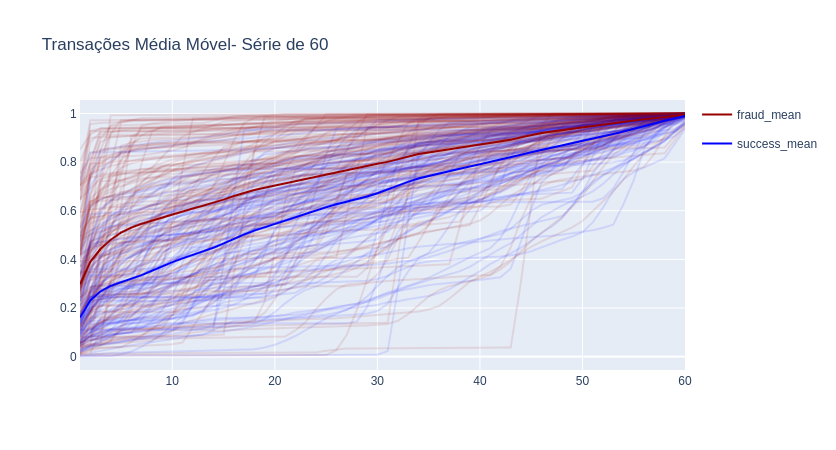

In [15]:
plot_series(df_transactions_ma, df_info, 'Transações Média Móvel- Série de 60')

### New holders

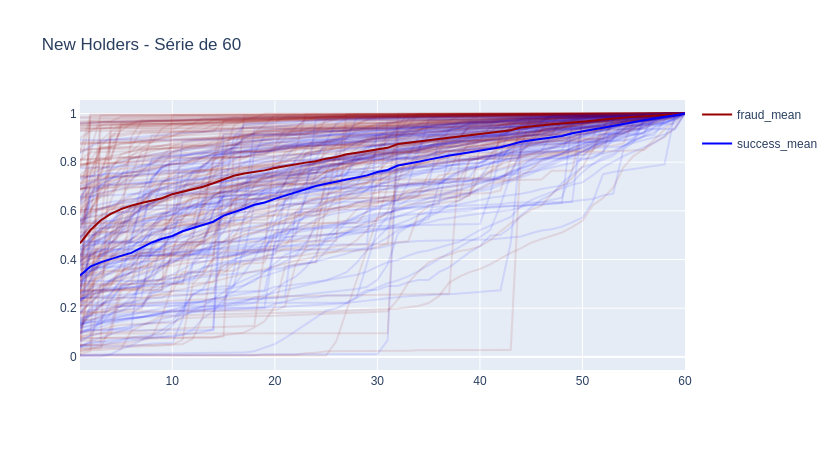

In [16]:
plot_series(df_new_holders, df_info, 'New Holders - Série de 60')

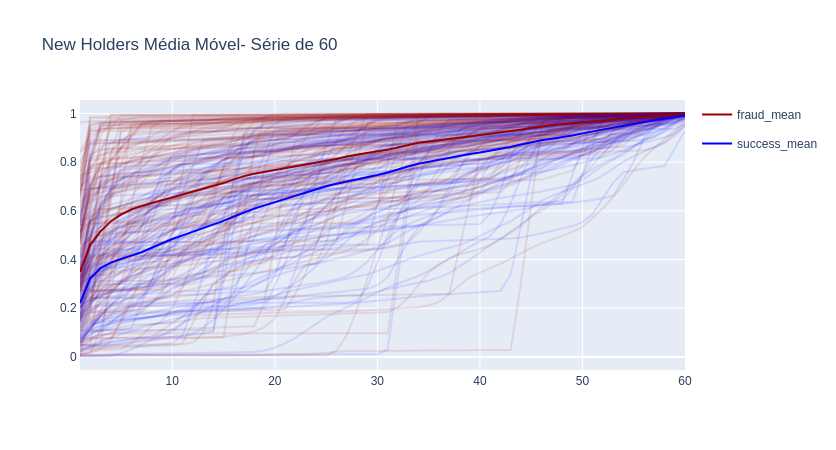

In [17]:
plot_series(df_new_holders_ma, df_info, 'New Holders Média Móvel- Série de 60')

### Biggest Holder

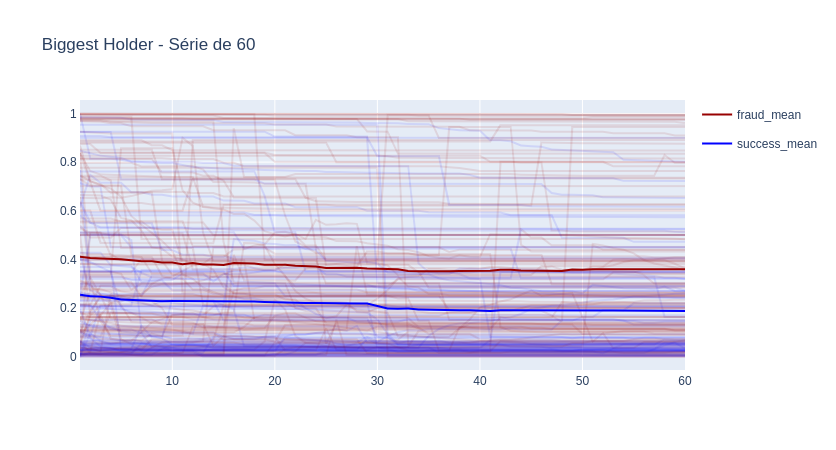

In [18]:
plot_series(df_big_holder, df_info, 'Biggest Holder - Série de 60')

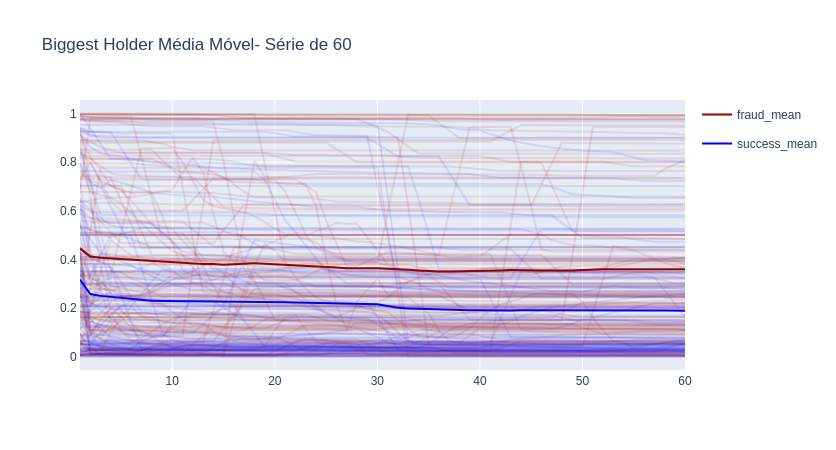

In [19]:
plot_series(df_big_holder_ma, df_info, 'Biggest Holder Média Móvel- Série de 60')

### New biers

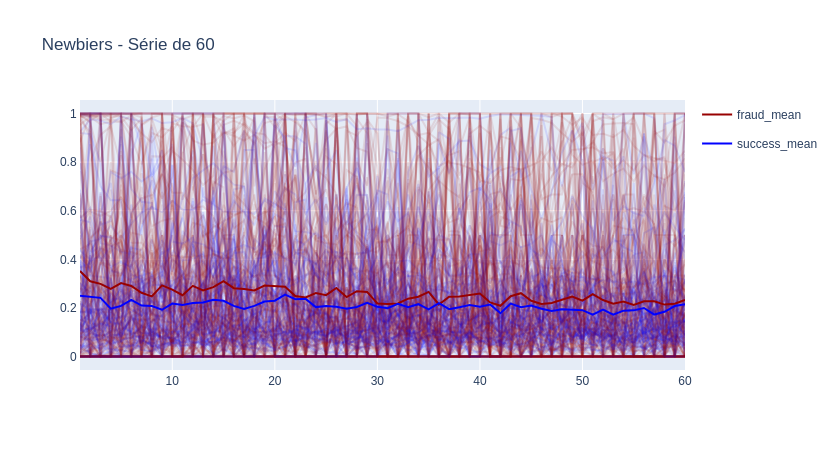

In [20]:
plot_series(df_newbiers, df_info, 'Newbiers - Série de 60')

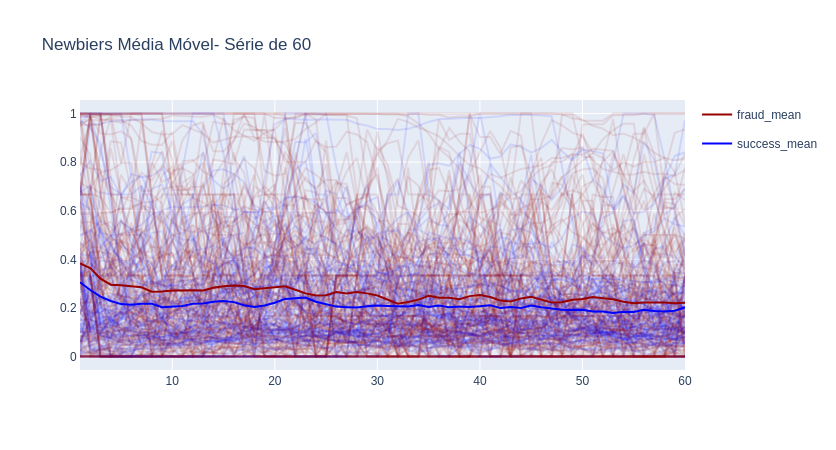

In [21]:
plot_series(df_newbiers_ma, df_info, 'Newbiers Média Móvel- Série de 60')

### Gas Ratio

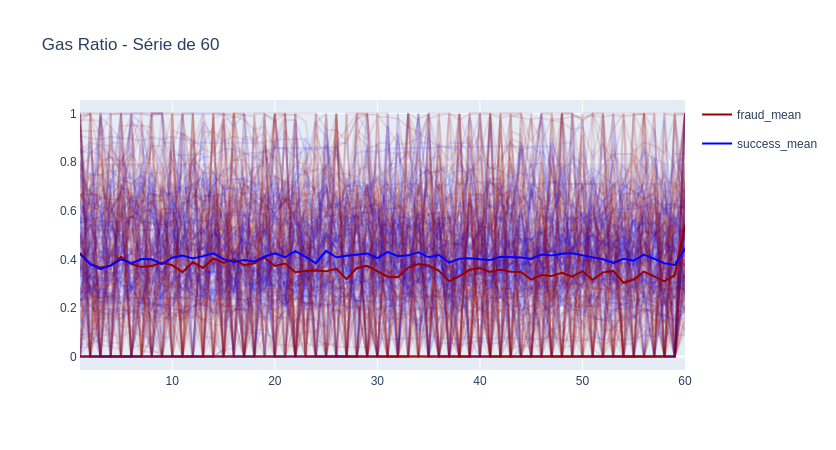

In [22]:
plot_series(df_gasratio, df_info, 'Gas Ratio - Série de 60')

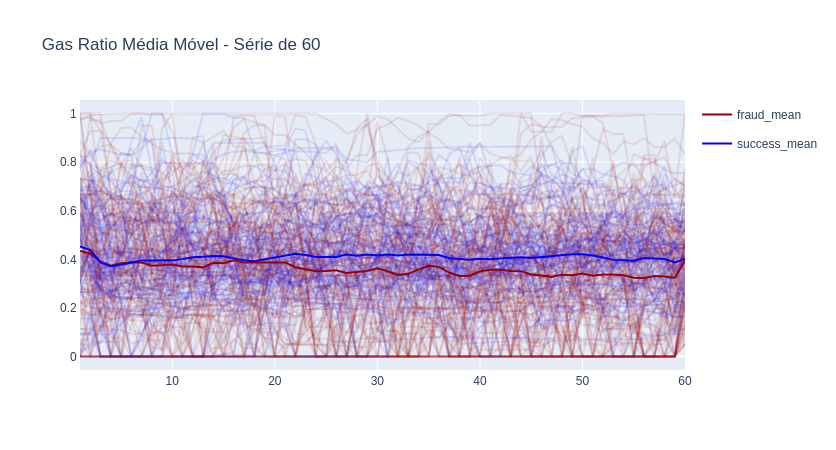

In [23]:
plot_series(df_gasratio_ma, df_info, 'Gas Ratio Média Móvel - Série de 60')